Epoch 1/2000


c:\anaconda\envs\AI\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.3898 - loss: 1.0834 - val_accuracy: 1.0000 - val_loss: 1.0323
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4410 - loss: 1.0448 - val_accuracy: 1.0000 - val_loss: 1.0263
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4371 - loss: 1.0326 - val_accuracy: 0.0000e+00 - val_loss: 1.0220
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5165 - loss: 1.0112 - val_accuracy: 0.0000e+00 - val_loss: 1.0238
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4922 - loss: 1.0069 - val_accuracy: 0.0000e+00 - val_loss: 1.0273
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6016 - loss: 0.9803 - val_accuracy: 0.0000e+00 - val_loss: 1.0309
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6172 - loss: 0.9448 - val_accuracy: 0.0000e+00 - val_loss: 1.0370
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6081 - loss: 0.9308 - val_accuracy: 0.0

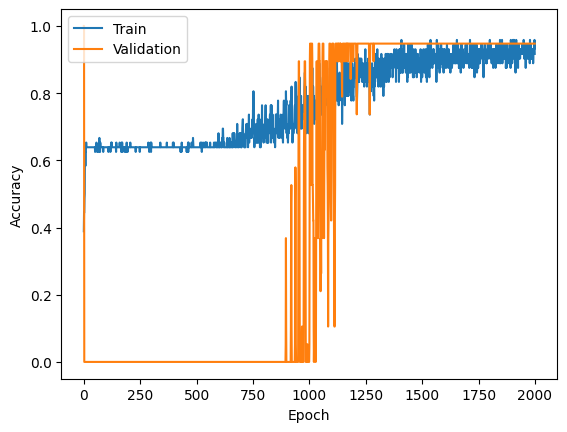

In [15]:
#523


from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드
raw_data = pd.read_csv('2.csv')

# 데이터 전처리
train = raw_data.iloc[:, :3].values  # 입력 특성 데이터 (num_samples, 3)
target = raw_data.iloc[:, 3].values  # 타깃 데이터 (num_samples,)

# 모델 생성
model1 = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=(3,)),  # 입력 차원이 3
    keras.layers.Dropout(0.4),
    keras.layers.Dense(3, activation='softmax')  # 출력 차원이 3 (classes)
])

# 모델 컴파일
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model1.fit(train, target, epochs=2000, validation_split=0.2)

# 모델 평가
test_loss, test_acc = model1.evaluate(train, target)
print('테스트 정확도:', test_acc)

# 학습 곡선 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [18]:
model1.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 100)            │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 3)              │           303 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,111 (8.25 KB)

 Trainable params: 703 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,408 (5.50 KB)

In [19]:
# 새로운 데이터 읽기
new_data = pd.read_csv('test.csv')

# 새로운 데이터 전처리
new_features = new_data.iloc[:, :3].values.reshape(-1, 3)  # 특성 데이터의 형태에 맞게 reshape

# 모델을 사용하여 예측 수행
predictions = model1.predict(new_features)

# 예측 결과 출력
for i, prediction in enumerate(predictions):
    predicted_class = np.argmax(prediction)  # 가장 높은 확률을 가지는 클래스 선택
    print(f"새로운 데이터 {i+1}의 예측 클래스: {predicted_class}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
새로운 데이터 1의 예측 클래스: 1
새로운 데이터 2의 예측 클래스: 1
새로운 데이터 3의 예측 클래스: 1
새로운 데이터 4의 예측 클래스: 1
새로운 데이터 5의 예측 클래스: 0
새로운 데이터 6의 예측 클래스: 1
새로운 데이터 7의 예측 클래스: 1
새로운 데이터 8의 예측 클래스: 1
새로운 데이터 9의 예측 클래스: 1
새로운 데이터 10의 예측 클래스: 1
새로운 데이터 11의 예측 클래스: 1
새로운 데이터 12의 예측 클래스: 1
새로운 데이터 13의 예측 클래스: 1
새로운 데이터 14의 예측 클래스: 1
새로운 데이터 15의 예측 클래스: 1
새로운 데이터 16의 예측 클래스: 1
새로운 데이터 17의 예측 클래스: 1
새로운 데이터 18의 예측 클래스: 1
새로운 데이터 19의 예측 클래스: 1
새로운 데이터 20의 예측 클래스: 1
새로운 데이터 21의 예측 클래스: 1
새로운 데이터 22의 예측 클래스: 1
새로운 데이터 23의 예측 클래스: 1
새로운 데이터 24의 예측 클래스: 1
새로운 데이터 25의 예측 클래스: 1
새로운 데이터 26의 예측 클래스: 1
새로운 데이터 27의 예측 클래스: 1
새로운 데이터 28의 예측 클래스: 1
새로운 데이터 29의 예측 클래스: 1
새로운 데이터 30의 예측 클래스: 1
새로운 데이터 31의 예측 클래스: 1
새로운 데이터 32의 예측 클래스: 1
새로운 데이터 33의 예측 클래스: 1
새로운 데이터 34의 예측 클래스: 1
새로운 데이터 35의 예측 클래스: 1
새로운 데이터 36의 예측 클래스: 1
새로운 데이터 37의 예측 클래스: 1
새로운 데이터 38의 예측 클래스: 1
새로운 데이터 39의 예측 클래스: 1
새로운 데이터 40의 예측 클래스: 1
새로운 데이터 41의 예측 클래스: 1
새로운 데이터 42의 예측 클래스: 1
새로운 데이터 43의 예측 클래스: 1
새로운 데이터 44의 예측 클래스: 1
새로운